# Thermica Post Process

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

from pythermica import  Thermica

In [2]:
path = "./simulation_1/results_1/"

therm_results = Thermica(path)

Initializing Thermica at path :
./simulation_1/results_1/
Files present in the path :
simulation_1/results_1/ionsat_deployed_3.0.pf.h5
simulation_1/results_1/ionsat_deployed_3.0.sf.h5
simulation_1/results_1/ionsat_deployed_3.1.rad.h5
simulation_1/results_1/ionsat_deployed.temp.h5
simulation_1/results_1/ionsat_deployed_3.1.edg.h5
simulation_1/results_1/ionsat_deployed_3.0.temp.h5
simulation_1/results_1/ionsat_deployed_3.0.edg.h5
simulation_1/results_1/ionsat_deployed_3.0.rad.h5
simulation_1/results_1/ionsat_deployed_3.1.box.h5
simulation_1/results_1/ionsat_deployed_3.0.box.h5
simulation_1/results_1/ionsat_deployed_3.1.pf.h5
simulation_1/results_1/ionsat_deployed_3.1.sf.h5

 the temperature files are :
[PosixPath('simulation_1/results_1/ionsat_deployed.temp.h5'), PosixPath('simulation_1/results_1/ionsat_deployed_3.0.temp.h5')]
We have some names :
['/Chassis bottom center', '/Chassis bottom left', '/Chassis bottom right', '/Chassis side front', '/Chassis side back left', '/Chassis side b

In [3]:
def find_internal_dissipations(thermica_obj=therm_results):
    """Find where and how much internal dissipation is present"""

    int_dissip = thermica_obj.get_internal_dissipation()

    """find the nodes where there is some dissipation during the simulation"""
    max_dissipations_over_time = int_dissip.max(axis=1)

    node_index_mask_dissipation = max_dissipations_over_time > 0.0

    
    names_with_dissipation = []
    total_dissipation_by_names = []

    for node_label, nodes_list_for_label in zip(therm_results.names_unique, therm_results.nodes_per_names):

        node_indexes_for_label = np.array([np.where(n==therm_results.node_liste)[0][0] for n in nodes_list_for_label])

        if any(node_index_mask_dissipation[node_indexes_for_label]) :
            "yes dissipation"
            names_with_dissipation.append(node_label)
            total_dissipation_by_names.append( max_dissipations_over_time[node_indexes_for_label].sum() )
        else:
            "no dissipation"
            
    return names_with_dissipation, total_dissipation_by_names

names_with_dissipation, total_dissipation_by_names = find_internal_dissipations()
print()
[print(f"{n:30s} : maximum {p:3.2f} W dissipated") for n, p in zip(names_with_dissipation, total_dissipation_by_names)];


 the temperature files are :
[PosixPath('simulation_1/results_1/ionsat_deployed.temp.h5'), PosixPath('simulation_1/results_1/ionsat_deployed_3.0.temp.h5')]

/Chassis top                   : maximum 38.34 W dissipated
/Chassis propeller support left : maximum 6.75 W dissipated
/Chassis propeller support right : maximum 6.75 W dissipated
/Band S front                  : maximum 6.03 W dissipated
/Band S bottom                 : maximum 6.03 W dissipated
/Batteries                     : maximum 4.00 W dissipated
/Transponder (1)               : maximum 2.00 W dissipated
/Printed Circuits              : maximum 2.00 W dissipated
/Powercard P60                 : maximum 2.00 W dissipated



 the temperature files are :
[PosixPath('simulation_1/results_1/ionsat_deployed.temp.h5'), PosixPath('simulation_1/results_1/ionsat_deployed_3.0.temp.h5')]

 the temperature files are :
[PosixPath('simulation_1/results_1/ionsat_deployed.temp.h5'), PosixPath('simulation_1/results_1/ionsat_deployed_3.0.temp.h5')]

 the temperature files are :
[PosixPath('simulation_1/results_1/ionsat_deployed.temp.h5'), PosixPath('simulation_1/results_1/ionsat_deployed_3.0.temp.h5')]


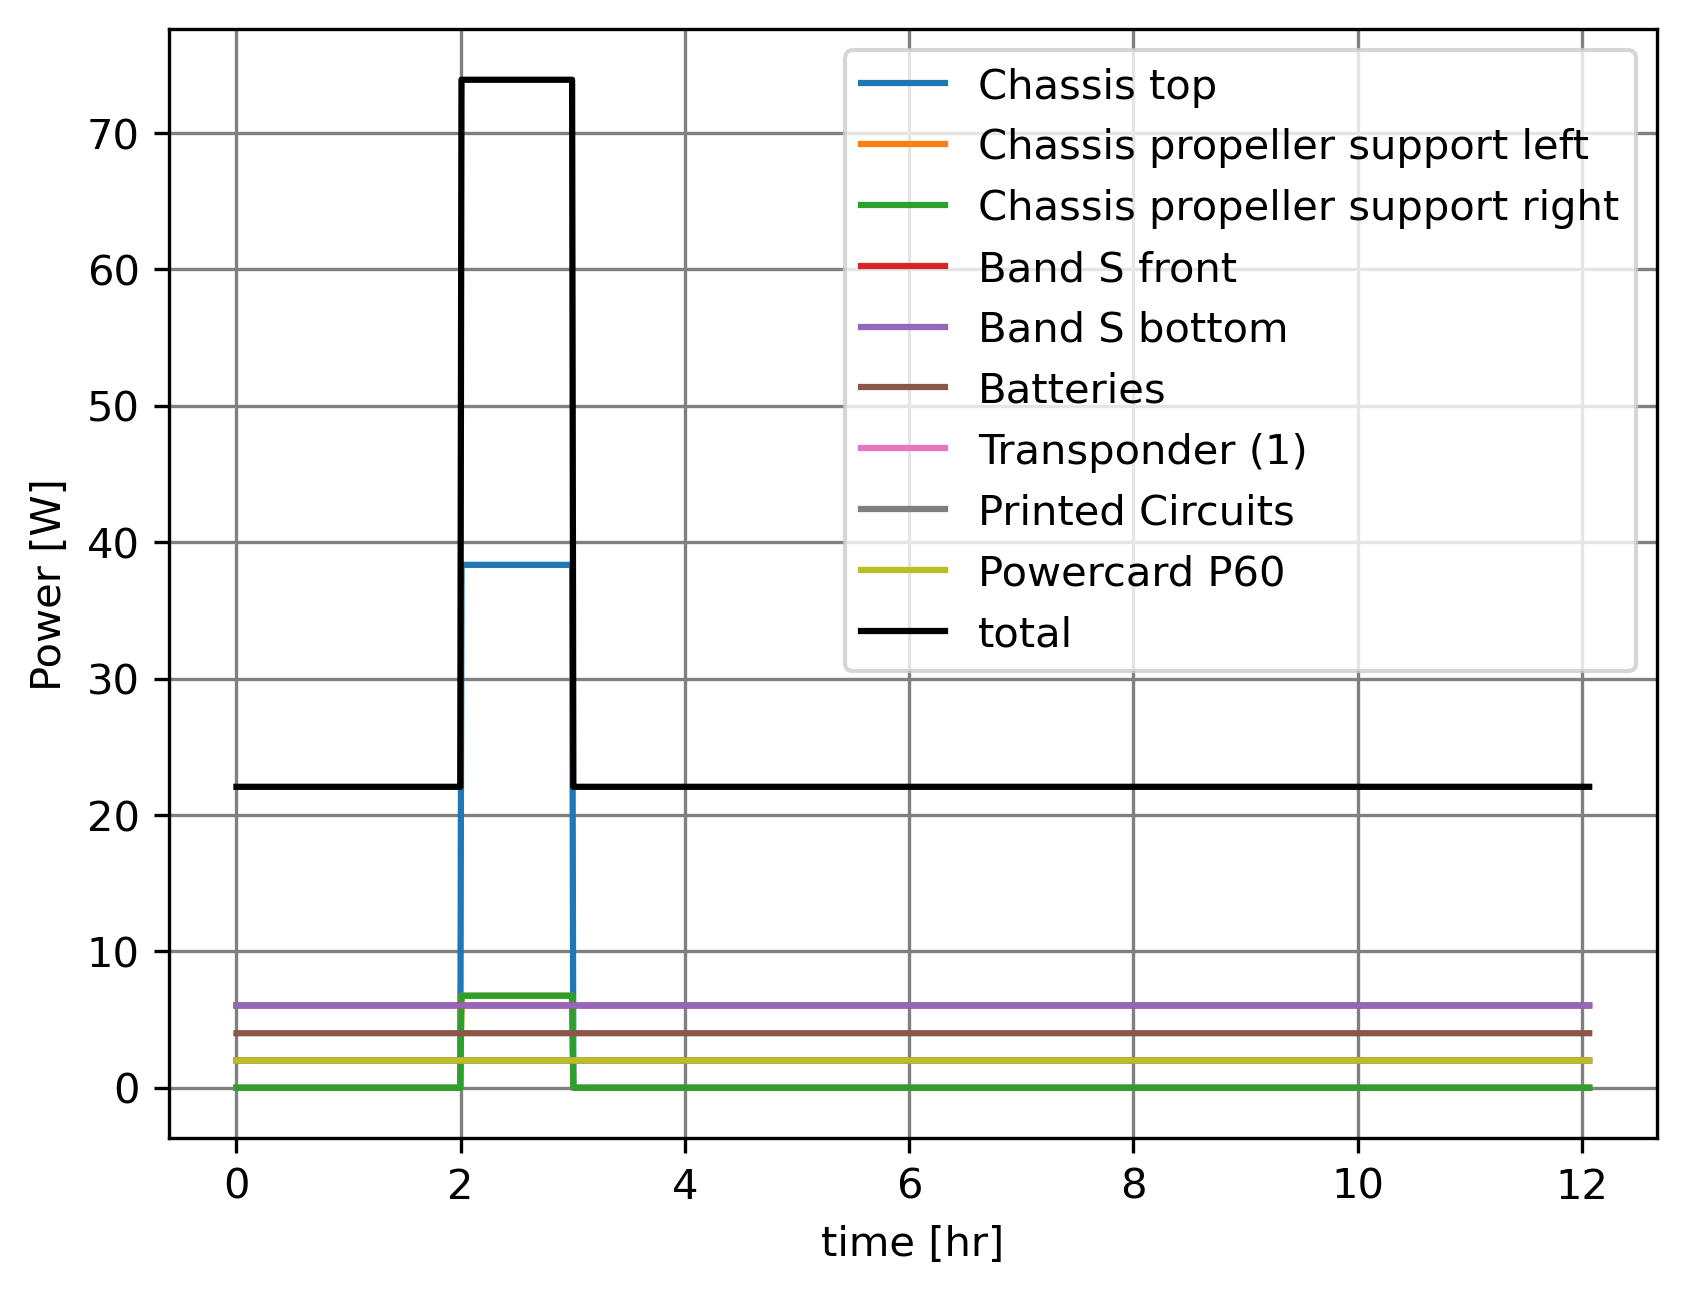

In [4]:
def plot_internal_dissipation(thermica_obj=therm_results):
    
    names_with_dissipation, total_dissipation_by_names = find_internal_dissipations(thermica_obj)
    time_temperature = thermica_obj.return_time_temperature()
    int_dissip = thermica_obj.get_internal_dissipation()

    total_power_variation = np.zeros_like(time_temperature)

        
    plt.figure()

    for node_label, nodes_list_for_label in zip(therm_results.names_unique, therm_results.nodes_per_names):

        power_variation = np.zeros_like(time_temperature)

        if node_label in names_with_dissipation:

            node_indexes_for_label = np.array([np.where(n==therm_results.node_liste)[0][0] for n in nodes_list_for_label])

            for indice in node_indexes_for_label:
                power_variation += int_dissip.T[:, indice]

            plt.plot(time_temperature - time_temperature[0], power_variation, label=node_label[1:])
            
            total_power_variation += power_variation
    
    plt.plot(time_temperature - time_temperature[0], total_power_variation, "k", label="total")
    
    plt.legend()
    plt.grid(color="grey")
    plt.xlabel("time [hr]")
    plt.ylabel("Power [W]")
    
plot_internal_dissipation()
plt.savefig("internal_dissipated_power.png", dpi=300)

Initializing Thermica at path :
./simulation_1/results_2/
Files present in the path :
simulation_1/results_2/ionsat_deployed_3.1.temp.h5
simulation_1/results_2/ionsat_deployed_3.1.rad.h5
simulation_1/results_2/ionsat_deployed_3.1.edg.h5
simulation_1/results_2/ionsat_deployed_3.1.box.h5
simulation_1/results_2/ionsat_deployed_3.1.pf.h5
simulation_1/results_2/ionsat_deployed_3.1.sf.h5

 the temperature files are :
[PosixPath('simulation_1/results_2/ionsat_deployed_3.1.temp.h5')]
We have some names :
['/Chassis bottom center', '/Chassis bottom left', '/Chassis bottom right', '/Chassis side front', '/Chassis side back left', '/Chassis side back right', '/Chassis side left', '/Chassis side right', '/Chassis top', '/Chassis propeller support left', '/Chassis propeller support right', '/Solar panel center', '/Solar panel left', '/Solar panel right', '/Propeller side front', '/Propeller side left', '/Propeller side right', '/Propeller top', '/Propeller bottom', '/Propeller side back', '/Band S 

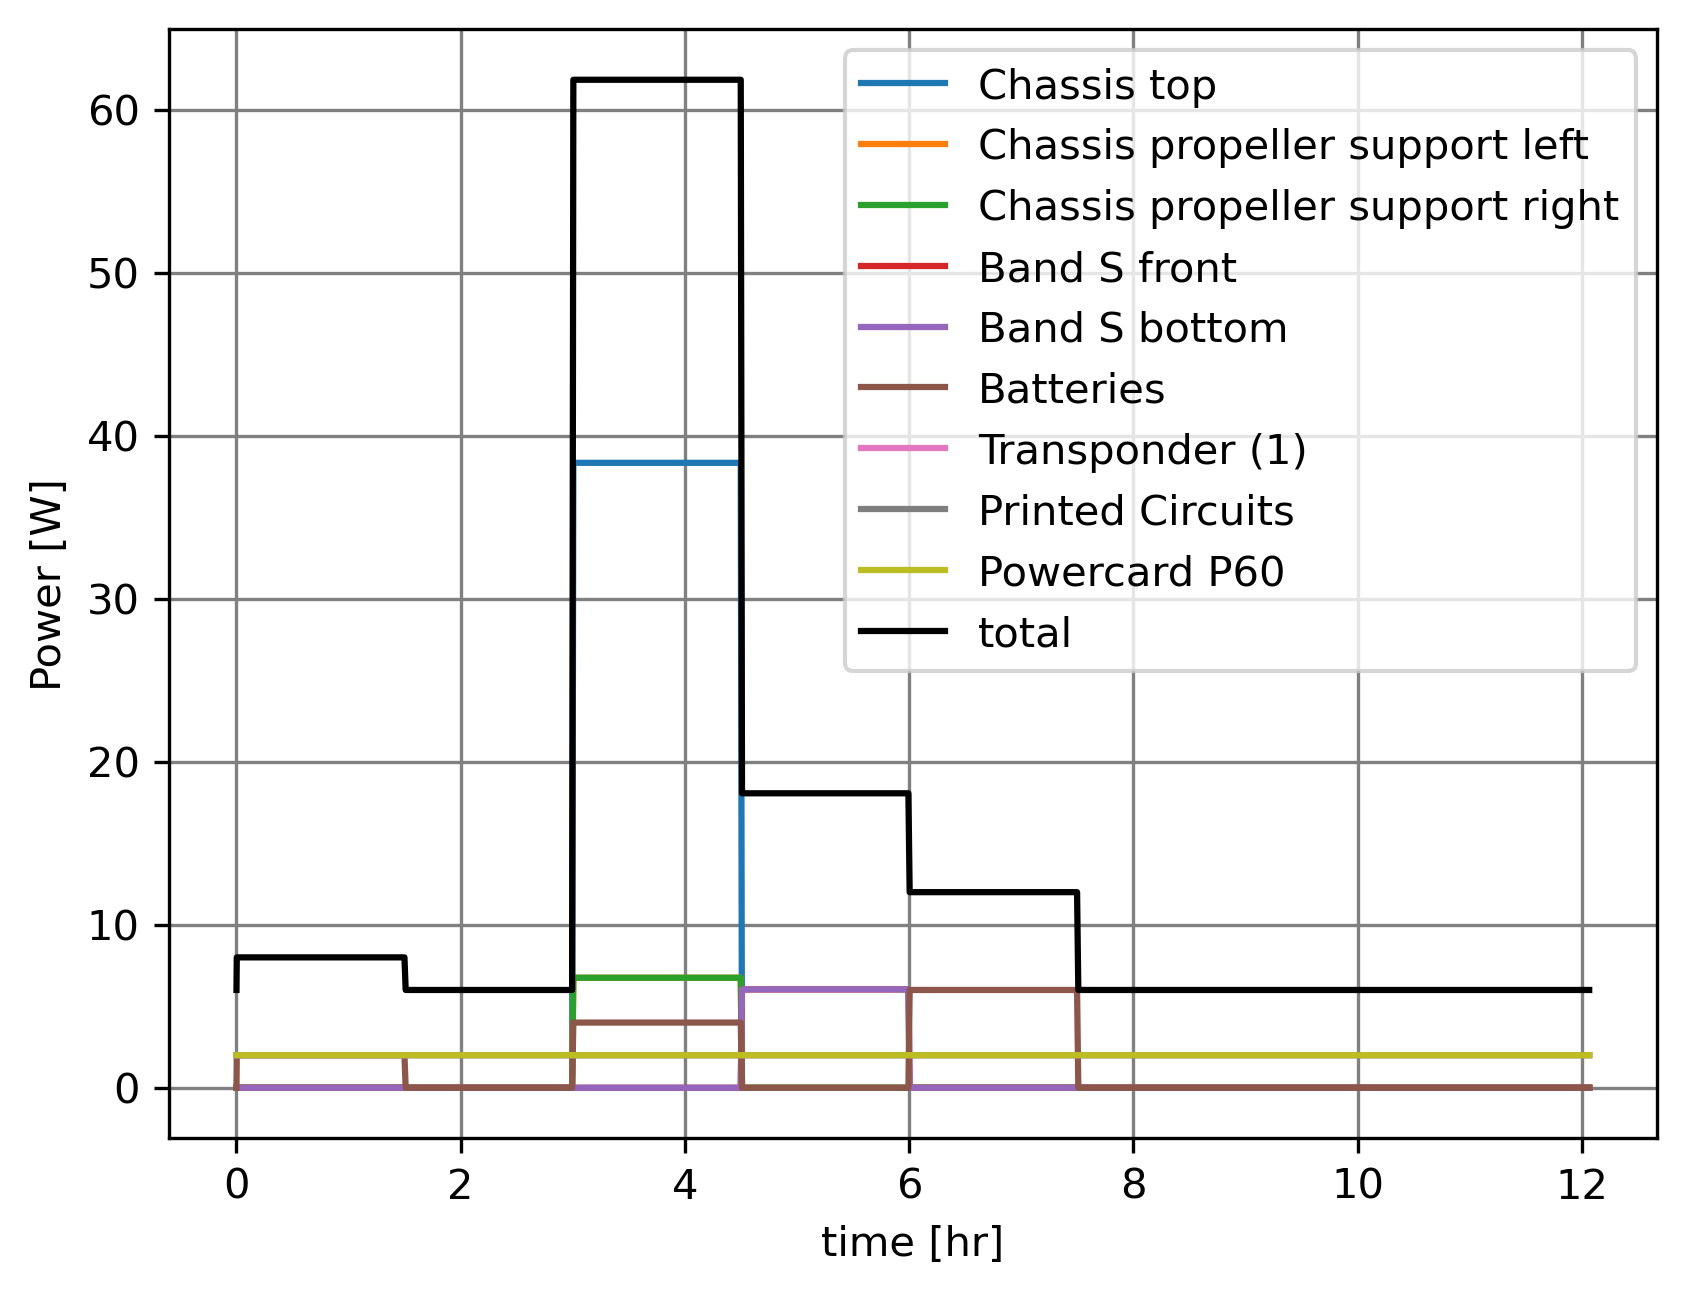

In [5]:
path = "./simulation_1/results_2/"

therm_results = Thermica(path)

plot_internal_dissipation(therm_results)
plt.savefig("internal_dissipated_power_typical_case.png", dpi=300)